In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# ==== Grid Setup ====
L = 1.0       # spatial domain length
T = 1.0       # total time
Nx = 100      # number of spatial points
Nt = 500      # number of time steps
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

### Initial Condition

\begin{equation}
u(x, y, 0) = \exp\left(-100 \left[ (x - 0.5)^2 + (y - 0.5)^2 \right] \right),
\quad (x, y) \in [0,1]^2
\end{equation}

In [8]:
def set_initial_condition(U):
    U[0, :] = np.exp(-100 * (x - 0.5)**2)

### Boundary Condition

\begin{equation}
u(x, y, t) = 0, \quad \text{for } (x, y) \in \partial \Omega,\ t > 0
\end{equation}


In [9]:
def apply_boundary_conditions(U, n):
    U[n, 0] = 0
    U[n, -1] = 0

### Source term

In [10]:
# ==== 3. Nonlinear Source Term ====
def source_term(u, lam):
    return lam * np.sin(u)

### Solve the equations

In [11]:
# ==== 4. Solver Function ====
def solve_heat_equation(alpha=0.01, lam=1.0):
    U = np.zeros((Nt, Nx))
    set_initial_condition(U)
    for n in range(Nt - 1):
        apply_boundary_conditions(U, n)
        for i in range(1, Nx - 1):
            U[n + 1, i] = (
                U[n, i]
                + alpha * dt / dx**2 * (U[n, i + 1] - 2 * U[n, i] + U[n, i - 1])
                + dt * source_term(U[n, i], lam)
            )
    return U

### Plot the results

In [12]:

def plot_2d_solution(U):
    plt.figure(figsize=(10, 5))
    plt.imshow(U.T, extent=[0, T, 0, L], aspect='auto', origin='lower', cmap='hot')
    plt.xlabel("Time t")
    plt.ylabel("Position x")
    plt.title("Heat Equation Solution u(x, t)")
    plt.colorbar(label="u")
    plt.tight_layout()
    plt.show()

def plot_1d(U, at='x', value=0.5):
    if at == 'x':
        idx = np.argmin(np.abs(x - value))
        plt.plot(t, U[:, idx])
        plt.xlabel("Time t")
        plt.ylabel(f"u(x={x[idx]:.2f}, t)")
        plt.title(f"u(t) at x = {x[idx]:.2f}")
    elif at == 't':
        idx = np.argmin(np.abs(t - value))
        plt.plot(x, U[idx, :])
        plt.xlabel("Position x")
        plt.ylabel(f"u(x, t={t[idx]:.2f})")
        plt.title(f"u(x) at t = {t[idx]:.2f}")
    else:
        raise ValueError("`at` must be 'x' or 't'")
    plt.grid(True)
    plt.tight_layout()
    plt.show()




### Solve and plot

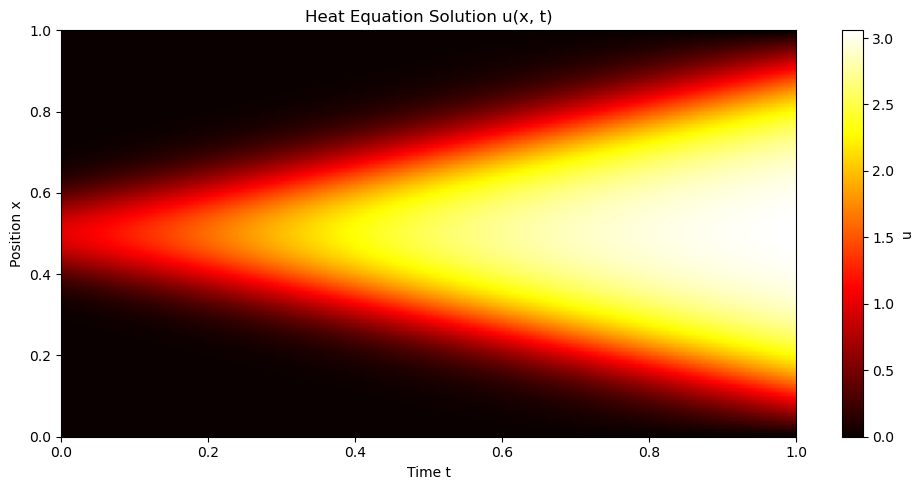

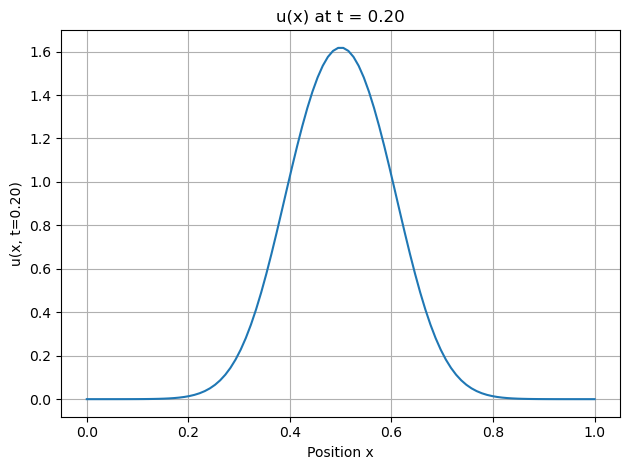

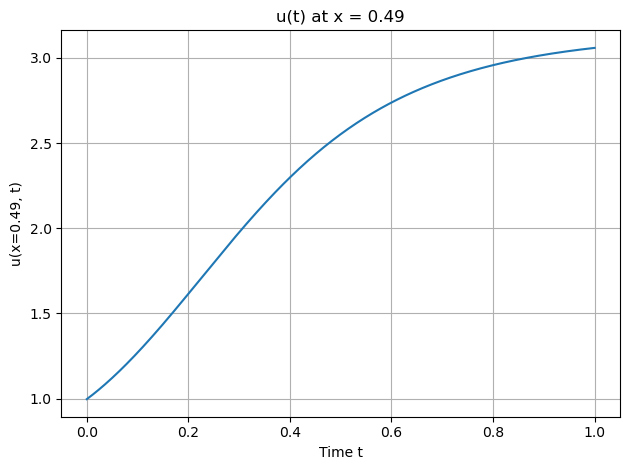

In [13]:
# ==== Example Usage ====
U_result = solve_heat_equation(alpha=0.01, lam=5.0)
plot_2d_solution(U_result)
plot_1d(U_result, at='t', value=0.2)
plot_1d(U_result, at='x', value=0.5)

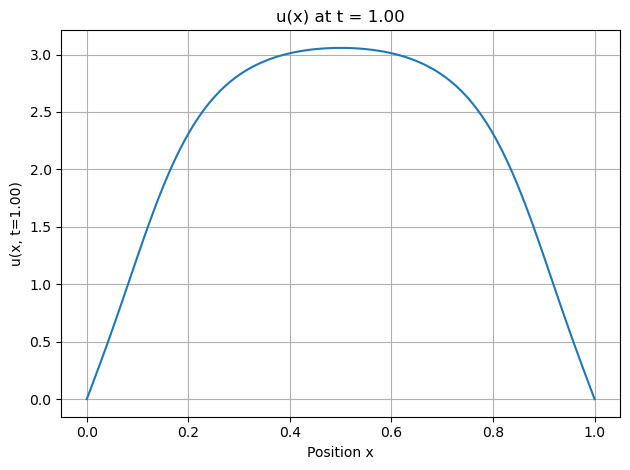

In [14]:
plot_1d(U_result, at='t', value=1.0)